# [講義] Matplotlib 実践編
データ構造化プログラムでよく利用される、折れ線グラフ、棒グラフ、ヒートマップを題材に、Matplotlibの実践的な機能をご紹介します。

# 目次
1. MatplotlibのAPI
1. 折れ線グラフ
1. 棒グラフ
1. ヒートマップ
1. 出力・保存

# 本講義で使用するファイルのダウンロード

本講義で使用するファイルを、下のコードを実行してダウンロードしておきましょう。

In [ ]:
! git clone https://github.com/tendo-sms/python_intermediate_2022
! ls

# MatplotlibのAPI
ここでは、MatplotlibのAPIについて紹介します。Matplotlibでグラフを描く際の関数・メソッドの呼び出し方法には大きく分けて以下の2種類の方法があります。
- Axesインターフェース (オブジェクト指向インタフェース)
- pyplotインターフェース

これらを混同して使用してしまうと思い通りの動作にならないこともありますので、しっかり使い分けられるようにしましょう。

## Matplotlibの構成要素
以降の説明のために、Matplotlibで表示されるオブジェクトの構成要素を説明します。

Matplotlibでグラフを描く際の構成要素として、描画領域全体のFigureと個々のプロット領域であるAxesがあります。

また、個々の部品(目盛りラベル、グラフ自体、軸のラベルなど)それぞれのことをArtistと呼びます。

これらは階層構造になっていて、Figureオブジェクトの中に複数のAxes、Axesオブジェクトの中に複数のArtistオブジェクトを持っています。

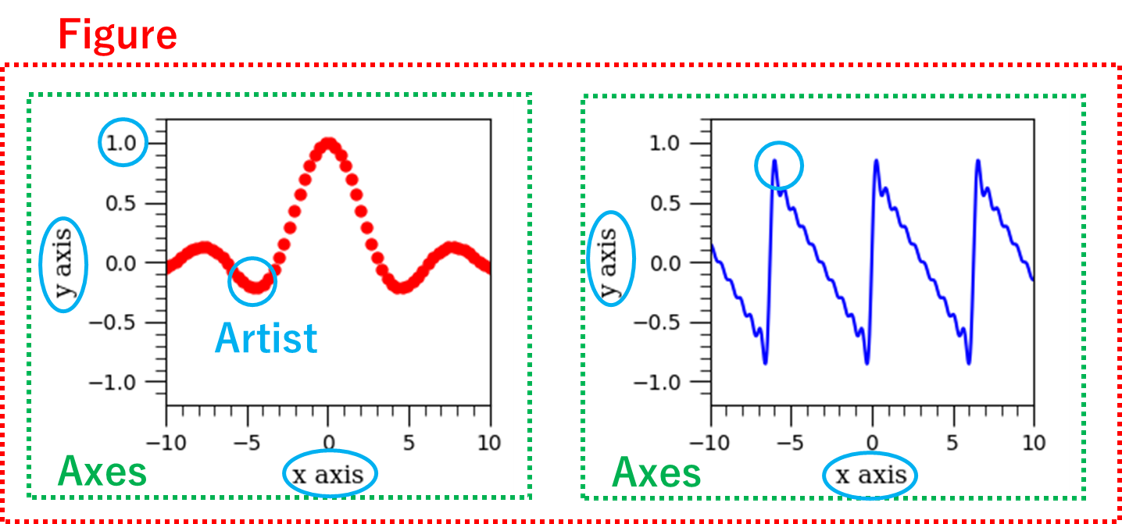

## Axesインターフェース
ここではMatplotlibの一つ目のAPIであるAxesインターフェースについて説明します。

Axesインターフェースでは、FigureオブジェクトやAxesオブジェクトを明示的に生成して操作します。

操作対象が分かりやすくなるため、こちらの方法で図を作成することが推奨されています。

後で説明するpyplotインターフェースであっても、裏ではこの方法で実行されています。

本講義でも、こちらのインターフェースを使って説明をします。

In [ ]:
import matplotlib.pyplot as plt

# Figureオブジェクトの作成
fig = plt.figure()

# Axesオブジェクトの作成
ax = fig.subplots()

# グラフの作成
ax.plot([1, 2, 3, 4, 5, 6, 7], [0, 0.1, 0.25, 0.7, 1, 0.8, 0.2])

# グラフの表示
fig.show()

# 終了時はcloseを実行するようにしましょう。環境によってはメモリを圧迫することがあります。
# closeを実行してしまうと表示が消えてしまうので、今回はコメントアウトしています。
# plt.close(fig)

# pyplotインターフェース
pyplotインターフェースは、最後に作成されたFigureやAxesに対して処理を行います。

Google ColaboratoryやJupyter Notebookのようなインタラクティブな操作や、簡単な動作確認をしたい時には便利な方法です。

一方でどのグラフについて操作しているか分かりづらいため、細かい調整をしたり、複数のグラフを描きたい時には避けた方が良いです。

In [ ]:
import matplotlib.pyplot as plt

# グラフの作成
plt.plot([1, 2, 3, 4, 5, 6, 7], [0, 0.1, 0.25, 0.7, 1, 0.8, 0.2])

# グラフの表示
plt.show()

# plt.close()

# 折れ線グラフのプロット

折れ線グラフは「plot」というメソッドを使用します。

実際のデータ構造化プログラムでは、スペクトルデータの可視化などによく利用されます。

plotメソッドには引数で表示するためのデータを渡しますが、グラフの表示設定も引数で記述出来ます。

まずは例を見てみましょう。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

# X軸データ
data_x = [1, 2, 3, 4, 5, 6, 7]
# Y軸データ
data_y = [0, 0.1, 0.25, 0.7, 1, 0.8, 0.2]

# グラフの作成
ax.plot(data_x, data_y, linestyle="--", linewidth=2.0, color="b", marker="s", label="legend1")

ax.legend(labels=["legend1"], loc="upper left", fontsize=12)  # 凡例表示

fig.show()

# plt.close(fig)

よく使われる引数を紹介します。

| 引数(省略形) | 説明 | 例 |
| --- | --- | --- |
| linestyle(ls) | 線の種類 | "-" (直線), "--" (破線), ":" (点線), "" (線を表示しない) |
| linewidth(lw) | 線の太さ。float形式で設定します | 2.0 |
| color(c) | 線の色 | "b" (青), "m" (マゼンタ), "r" (赤), "#00FF00"(16進のカラーコードも記述出来ます) |
| marker | マーカーの形状 | "." (点), "^" (▲), "s", (■) |
| markeredgecolor(mec) | マーカーの枠の色 | "b", "m", "r"など |
| markerfacecolor(mfc) | マーカーの中の色 | "b", "m", "r"など |
| markersize(ms) | マーカーの大きさ | 10 |
| label | プロットの名称。凡例に表示される | "sample_legend" |

設定する際は、キーワード引数として記述します。

色やマーカーの形状などはMatplotlibで豊富に用意されていて、簡単に変更出来ます。公式ドキュメントにも記載がありますので、好みの設定を探してみましょう。

線の種類
https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle

色の設定
https://matplotlib.org/stable/gallery/color/named_colors.html

マーカーの設定
https://matplotlib.org/stable/api/markers_api.html

### 凡例
凡例は、「plot」メソッドの引数「label」に値を設定するだけでは表示されません。
```
ax.legend(labels=["legend1"], loc="upper left", fontsize=12)  # 凡例表示
```
のように、凡例表示のための「legend」メソッドを呼ぶ必要があります。

legendメソッドにも引数で設定を記述出来ます。よく使われる引数に以下のようなものがあります。

| 引数(省略形) | 説明 | 例 |
| --- | --- | --- |
| handles | 凡例を表示するArtist。リスト形式で設定 | [line1, line2] |
| labels | 凡例を表示するArtistのラベル。リストで設定 | ["legend1", "legend2"] |
| fontsize | フォントサイズ。intもしくは"small"などの文字列で設定 | 15, "small", "large"など |
| alignment | 凡例枠内の文字揃え | "center", "left", "right" |
| loc | 凡例の表示位置 | "best" (重ならないよう自動設定), "upper left" (左上), "lower right" (右下), "center" (中央) など |


# 軸の最大値、最小値

Matplotlibのデフォルトでは、グラフの表示範囲はデータの存在範囲に合わせたものになります。

軸の範囲を指定してグラフを描画したい場合は、「set_xlim」、「set_ylim」で範囲指定が出来ます。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

data_x = [1, 2, 3, 4, 5, 6, 7]
data_y = [0, 0.1, 0.25, 0.7, 1, 0.8, 0.2]

# 表示範囲の指定
ax.set_xlim(3, 6)  # いくつ以上、いくつ以下の範囲をプロットするか

ax.plot(data_x, data_y, linestyle="--", linewidth=2.0, color="b", marker="s")

fig.show()

# plt.close(fig)

## ログスケール

plotメソッドでのグラフ表示の際、軸をログスケール表示に変更することも出来ます。

X軸のみ、Y軸のみ、両対数いずれにも対応できます。

Axesオブジェクトに対して、set_xscaleもしくはset_yscaleメソッドで "log" という値を指定することで設定出来ます。

以下は、指数関数を対数軸で表示する例です。
実行してみましょう。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

# X軸のデータ
data_x = np.arange(0.1, 20.0, 0.1)
# Y軸のデータ(指数関数)
data_y = np.exp(data_x)

# 対数軸に設定
ax.set_yscale("log")

ax.plot(data_x, data_y)
fig.show()
# plt.close(fig)

# グラフの装飾
ここからはグラフの軸や凡例など、より詳細な設定について見ていきます。

## メモリラベルの表示設定
メモリのラベルの表示方法を変更するためによく使われるのが「ticker」と「formatter」です。

Matplotlibでは何も設定をしなくても軸のメモリをある程度見やすいように整えてくれますが、細かい設定をしたいこともあります。

### ticker
軸のメモリについて細かく調整したいときにtickerを使用します。
メモリの間隔を設定したり、メモリ表示の最大数を設定したりすることで、グラフの軸を調整出来ます。

Axesインターフェースでは、set_major_locatorメソッドなどで設定します。

### formatter
formatterはメモリラベルの表記フォーマットを設定できます。複数のラベルを同じフォーマットで成形したい時に便利な方法です。

set_major_fomatterなどで設定します。


下の例では、メモリのラベルは4刻み、メモリの線は2刻みにして、Y軸の表記を10<sup>3</sup>ではなく、1.0e+3というような指数表記にしてみます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

fig = plt.figure()
ax = fig.subplots()

data_x = np.arange(0.1, 20.0, 0.1)
data_y = np.exp(data_x)

# メジャーロケータ（ラベル付きのメモリ）を4刻みで設定
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

# マイナーロケータ（ラベル無しの細かいメモリ）を2刻みで設定
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

# Y軸をログスケールに設定
ax.set_yscale("log")

# 縦軸の表記を10^3ではなく1.0e+3という指数表記に統一
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1e}"))

ax.plot(data_x, data_y)
fig.show()
# plt.close(fig)

formatterでは数値の表記だけでなく、日付表記の変更にもよく利用されます。

データはPythonのdatetimeオブジェクトなどの形で渡し、matplotlib.dates.DateFormatterで表記方法を指定します。

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig = plt.figure()
ax = fig.subplots()

# X軸データをdatetime形式で用意
data_x = [
    datetime.datetime(2022, 12, 1, 14, 00),
    datetime.datetime(2022, 12, 1, 15, 00),
    datetime.datetime(2022, 12, 1, 16, 00),
    datetime.datetime(2022, 12, 1, 17, 00)
]
data_y = [0, 0.5, 1, 0.2]

# メモリの表示位置を設定
ax.set_xticks(data_x)

# メモリの表記を設定(datetimeのstrftimeの形式で設定する)
ax.xaxis.set_major_formatter(DateFormatter("%Y/%m/%d\n%H:%M"))

ax.plot(data_x, data_y)
fig.show()
# plt.close(fig)

## グラフのタイトル、軸のラベル、グリッド線
グラフにタイトルを付けるには、「set_title」メソッドを使用します。

同様に、軸のラベル設定は、「set_xlabel」、「set_ylabel」を使用します。

グリッド線は、最近のMatplotlibの最近のバージョンではデフォルトで非表示になっており、表示する場合は「grid」メソッドを使用します。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

data_x = [1, 2, 3, 4, 5, 6, 7]
data_y = [0, 0.1, 0.25, 0.7, 1, 0.8, 0.2]

# タイトルを設定
ax.set_title("タイトル")

# X軸のラベル設定
ax.set_xlabel("X軸のラベル")

# Y軸のラベル設定
ax.set_ylabel("Y軸のラベル")

# グリッド線を表示
ax.grid(True)

ax.plot(data_x, data_y)
fig.show()
# plt.close(fig)

上の例のようにデフォルト設定のまま日本語のタイトルを付けようとすると文字化けしてしまい、正しく表示されません。

これはMatplotlibのデフォルトフォントが日本語に対応していないためです。

グラフ内に日本語を表示するには、日本語対応のフォントに変更する必要があります。

以下では、Googleによって開発されたフリーフォントである「Noto Sans JP」を使用して日本語を表示します。

フォントファイルは講義の最初に必要ファイルとしてダウンロードし、python_intermediate_2022/04_matplotlib/NotoSansJP-Medium.otf に配置してあります。

このファイルは以下のページからも取得出来ます。

https://fonts.google.com/noto/specimen/Noto+Sans+JP?query=noto+sans+jp

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import font_manager

# フォントファイルをMatplotlibに認識させる
fp = font_manager.FontProperties(fname=Path.cwd().joinpath("python_intermediate_2022", "04_matplotlib", "NotoSansJP-Medium.otf"))

fig = plt.figure()
ax = fig.subplots()

# フォントの設定
hfont = {"fontproperties": fp, "size": 15}
ax.set_title("グラフのタイトル", **hfont)

# X軸のラベル設定
ax.set_xlabel("X軸のラベル", **hfont)

# Y軸のラベル設定
ax.set_ylabel("Y軸のラベル", **hfont)

# グリッド線を表示
ax.grid()

ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
fig.show()

# plt.close(fig)

今度は日本語が正しく表示されました。今回はフリーフォントをダウンロードしてそれを使用しましたが、そのシステムにインストール済みのフォントをMatplotlibが認識してくれていることもあります。その場合はset_titleメソッドの引数にフォントを指定するだけで日本語が表示出来ます。

指定できるフォント一覧は以下のようなコードで確認することが出来ます。

In [ ]:
import matplotlib.font_manager as fm

font_list = [f.name for f in fm.fontManager.ttflist]

font_list

# 棒グラフ
続いて棒グラフについて説明します。棒グラフは「bar」というメソッドを使用します。

データ構造化プログラムのスペクトルデータの可視化には、折れ線グラフだけでなく棒グラフもよく使用されます。

折れ線グラフと同様に、引数で表示するデータや表示設定を記述します。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

# X軸データ
x = [1, 2, 3, 4, 5]

# グラフの高さデータ
height = [100, 200, 300, 400, 500]

# 棒グラフの作成
ax.bar(x, height, width=1.0, linewidth=2.0, edgecolor="k", facecolor="c", align="edge")

fig.show()
# plt.close(fig)

よく使われる引数を紹介します。

| 引数(省略形) | 説明 | 例 |
| --- | --- | --- |
| width | 棒の太さ。floatで設定する。デフォルトは0.8 | 1.0 (隣の棒との間隔を1.0とする相対値で設定する) |
| linewidth(lw) | 棒の枠線の太さ。 | 2.0 |
| edgecolor(ec) | 棒の枠線の色 | "b" (青), "m" (マゼンタ), "r" (赤) など |
| facecolor(fc) | 棒の内部の色 | 同上 |
| align | 棒の位置 | "center", "edge" |
| label | プロットの名称。凡例に表示される | "sample_legend" |

# ログスケール
棒グラフでも、折れ線グラフと同様に対数軸設定が出来ます。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

x = [1, 2, 3, 4, 5]
height = [100, 200, 300, 400, 500]

# X軸をログスケールに設定
ax.set_xscale("log")

# Y軸をログスケールに設定
ax.set_yscale("log")

ax.bar(x, height, width=1.0, linewidth=2.0, edgecolor="k", facecolor="c", align="edge")

fig.show()
# plt.close(fig)

# ヒートマップ

Matplotlibでヒートマップを作成する場合は、「imshow」メソッドを使用します。

また、そのヒートマップに対応するカラーバーの作成には、「colorbar」メソッドを使用します。

電子顕微鏡画像などの可視化には、ここで紹介するimshowメソッドが使用されます。

まずは例を見てみましょう。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

# ヒートマップの2次元Arrayの作成
data = [
    [0.1, 0.2, 0.3, 0.4, 0.5], 
    [1, 1.3, 1.6, 2, 2.3],
    [2.5, 2.7, 10, 2.7, 2.5],
    [2.3, 2, 1.6, 1.3, 1],
    [0.5, 0.4, 0.3, 0.2, 0.1]
]

# ヒートマップの作成
im = ax.imshow(data)

# カラーバーの作成
fig.colorbar(im)

# 目盛りの削除
ax.set_axis_off()

fig.show()
# plt.close(fig)

このままだと色の変化が分かりづらいですね。

ヒートマップは、表示したい数値（今回であれば0.1～10の値）を0～1に規格化し、その値に色を割り当てることで描かれています。

その規格化の方法も、色の区切りを独自設定する、ログスケールにする、正負の範囲が対称なカラーバーにするなど、細かく設定出来ます。

上で表示したグラフを、色の変化を分かりやすくするためにシンプルなログスケールで規格化し直してみましょう。

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig = plt.figure()
ax = fig.subplots()

data = [
    [0.1, 0.2, 0.3, 0.4, 0.5], 
    [1, 1.3, 1.6, 2, 2.3],
    [2.5, 2.7, 10, 2.7, 2.5],
    [2.3, 2, 1.6, 1.3, 1],
    [0.5, 0.4, 0.3, 0.2, 0.1]
    ]

# 規格化方法を指定して、ヒートマップを作成
im = ax.imshow(data, norm=LogNorm())

fig.colorbar(im)

ax.set_axis_off()
fig.show()
# plt.close(fig)

上の方法でも、値が小さい部分の変化が分かりやすくなりました。

また、このデータはほとんどの値が0～3の間に収まっています。

もし3以上の値は無視して良ければ、imshowの引数でvmin、vmaxを指定することでカラーバーの最小値、最大値を指定することもできます。

この場合、最大値を超える値があることをカラーバーの端の形で表現出来ます。extend引数に "both", "max" 等を設定することで表示できます。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

data = [
    [0.1, 0.2, 0.3, 0.4, 0.5], 
    [1, 1.3, 1.6, 2, 2.3],
    [2.5, 2.7, 10, 2.7, 2.5],
    [2.3, 2, 1.6, 1.3, 1],
    [0.5, 0.4, 0.3, 0.2, 0.1]
    ]

# vmin、vmaxでカラーバーの最小値、最大値を指定
im = ax.imshow(data, vmin = 0, vmax = 3)
fig.colorbar(im, extend="max")  # extend="max"で最大値を超える場合があることを表現

ax.set_axis_off()
fig.show()
# plt.close(fig)

上の例では、紺～黄色の変化をするMatplotlibのデフォルトのカラーマップを使用しました。

独自のカラーマップを定義して利用することも出来ますし、Matplotlibではカラーマップが豊富に用意されており、簡単に変更出来ます。

「jet」というカラーマップに変更するには、以下のように記述します。

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

fig = plt.figure()
ax = fig.subplots()

data = [
    [0.1, 0.2, 0.3, 0.4, 0.5], 
    [1, 1.3, 1.6, 2, 2.3],
    [2.5, 2.7, 10, 2.7, 2.5],
    [2.3, 2, 1.6, 1.3, 1],
    [0.5, 0.4, 0.3, 0.2, 0.1]
    ]

im = ax.imshow(data, cmap=cm.jet)  # カラーマップをjetに設定
fig.colorbar(im)

ax.set_axis_off()
fig.show()
# plt.close(fig)

以下のページにMatplotlibで選べるカラーマップ一覧がまとめられています。

表示するデータやその形式によっても、適切なカラーマップは変わるかもしれません。

好みのカラーマップを探してみましょう。

https://matplotlib.org/stable/tutorials/colors/colormaps.html

# 出力・保存
Matplotlibでグラフをファイルとして保存するときは、「savefig」メソッドを使用します。

savefigメソッドでは、解像度や出力フォーマットなどを指定できます。

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

data = [
    [0.1, 0.2, 0.3, 0.4, 0.5], 
    [1, 1.3, 1.6, 2, 2.3],
    [2.5, 2.7, 10, 2.7, 2.5],
    [2.3, 2, 1.6, 1.3, 1],
    [0.5, 0.4, 0.3, 0.2, 0.1]
  ]

im = ax.imshow(data, vmin = 0, vmax = 3)
fig.colorbar(im)

# 余白あり
fig.savefig("loose.png", dpi=100, format="png")

# 余白を削除
fig.savefig("tight.png", dpi=100, format="png", bbox_inches="tight")

# plt.close(fig)

よく使われる引数を紹介します。

| 引数(省略形) | 説明 | 例 |
| --- | --- | --- |
| dpi | 画像の解像度 | 100 |
| format | 出力フォーマット | "png"、"jpg"など |
| bbox_inches | 余白の大きさ | "tight" |

# 演習問題

それでは本講義で説明したことを思い出しながら、グラフを作成してみましょう。

グラフ作成用のデータは用意してありますので、見本画像のようなグラフを作成し、"practice.jpg"という名前のJPEG形式の画像として保存してみてください。

## 見本画像
![practice.jpg](https://github.com/tendo-sms/python_intermediate_2022/raw/main/04_matplotlib/practice.jpg)

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

data_x = [
    datetime.datetime(2022, 12, 1, 14, 00),
    datetime.datetime(2022, 12, 1, 15, 00),
    datetime.datetime(2022, 12, 1, 16, 00),
    datetime.datetime(2022, 12, 1, 17, 00)
]
oresen_data_y = [1, 1.5, 2, 2.2]

bou_data_y = [0.2, 0.5, 1, 0.8]


####### ここから回答例 #######

fp = font_manager.FontProperties(fname=Path.cwd().joinpath("python_intermediate_2022", "04_matplotlib", "NotoSansJP-Medium.otf"))

fig = plt.figure()
ax = fig.subplots()

ax.set_xticks(data_x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

hfont = {"fontproperties": fp, "size": 15}
ax.set_title("演習問題", **hfont)

ax.set_xlabel("X軸のラベル", **hfont)

ax.set_ylabel("Y軸のラベル", **hfont)

ax.xaxis.set_major_formatter(DateFormatter("%Y/%m/%d %H:%M"))

ax.plot(data_x, oresen_data_y, linestyle="-.", linewidth=2.0, color="b", marker="D", label="折れ線")
ax.bar(data_x, bou_data_y, width=datetime.timedelta(hours=1)*0.8, linewidth=2.0, edgecolor="k", facecolor="c", label="棒")

ax.legend(prop=fp)

ax.grid()

fig.show()

fig.savefig("practice.jpg", dpi=300, format="jpg")

# fig.close()
